In [1]:
# package from Xilinx pynq
from pynq import Overlay
from pynq import allocate
import numpy as np
import matplotlib.pyplot as mp
import ipywidgets as widgets
#FPGA overlay
ol = Overlay('./HVNMR.bit')

In [2]:
from pynq import Clocks
print(f'CPU {Clocks.cpu_mhz:.6f}MHz')
print(f'CLK0 {Clocks.fclk0_mhz:.6f}MHz')
print(f'CLK1 {Clocks.fclk1_mhz:.6f}MHz')
print(f'CLK2 {Clocks.fclk2_mhz:.6f}MHz')

CPU 1199.988000MHz
CLK0 99.999000MHz
CLK1 99.999000MHz
CLK2 99.999000MHz


In [3]:
file_Debug_ADC_System = open("Debug_setup/Debug_ADC_System.jpg", "rb")
image = file_Debug_ADC_System.read()
widgets.Image(value=image,format='png',width=450,height=350,)

Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00H\x00H\x00\x00\xff\xe1\x00\x80Exif\x00\x00MM\x00…

In [4]:
file_Debug_ADC_Testkit = open("Debug_setup/Debug_ADC_Testkit.jpg", "rb")
image = file_Debug_ADC_Testkit.read()
widgets.Image(value=image,format='png',width=450,height=350,)

Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00H\x00H\x00\x00\xff\xe1\x00\x80Exif\x00\x00MM\x00…

In [5]:
file_Debug_ADC_SignalSource = open("Debug_setup/Debug_ADC_SignalSource.jpg", "rb")
image = file_Debug_ADC_SignalSource.read()
widgets.Image(value=image,format='png',width=450,height=350,)

Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00H\x00H\x00\x00\xff\xe1\x00\x80Exif\x00\x00MM\x00…

In [6]:
# read IP-core
osci = ol.fpga_tracing_0
chip = ol.fpga_nmr_chip_config_0
adc0 = ol.fpga_ADC_AD7960_0 # ADC driver
adc1 = ol.fpga_ADC_AD7960_1 # ADC driver

In [7]:
#Set the mode of ADC
mode = 9
adc0.write(0x0,mode)  
adc1.write(0x0,mode)  

In [8]:
#Instantiate DMA
dma = ol.axi_dma_0
dma_send = ol.axi_dma_0.sendchannel
dma_recv = ol.axi_dma_0.recvchannel

In [9]:
# Define Buffer size
output_buffer_0 = allocate(shape=(32768*2*4,), dtype=np.int32)

In [10]:
# Autor: Zhibin
# 24.05.2022 
# module: osci 
# Register command address

# enable
C_ENABLE_CMD = 0*4
def enable():
    osci.write(C_ENABLE_CMD,1)
def disable():
    osci.write(C_ENABLE_CMD,0)
    
# run the single shot
C_SINGLE_SHOT_CMD = 1*4
def single_shot():
    osci.write(C_SINGLE_SHOT_CMD,1)
    
# select the analog trigger chanel 
C_SELECT_ANALOG_TRIGGER_CHANNEL_CMD = 2*4
def trigger_channel(data):
    osci.write(C_SELECT_ANALOG_TRIGGER_CHANNEL_CMD,data)
    
# set the analog trigger edge rising edge or falling edge enable
C_SET_ANALOG_TRIGGER_RISING_EDGE_CMD = 3*4
def trigger_ris_edge():
    osci.write(C_SET_ANALOG_TRIGGER_RISING_EDGE_CMD,1)
    
# set the analog trigger edge falling edge or falling edge enable
C_SET_ANALOG_TRIGGER_FALLING_EDGE_CMD = 4*4
def trigger_fal_edge():
    osci.write(C_SET_ANALOG_TRIGGER_FALLING_EDGE_CMD,1)
    
# set the digital chanle trigger rising edge enable 
C_BIN_CH_RE_TRIG_EN_CMD = 5*4
def digtal_trigger_ris_edge():
    osci.write(C_BIN_CH_RE_TRIG_EN_CMD,1)
    
# set the digital chanel trigger falling edge enable
C_BIN_CH_FE_TRIG_EN_CMD = 6*4
def digtal_trigger_fal_edge():
    osci.write(C_BIN_CH_FE_TRIG_EN_CMD,1)
    
# arm (register interface)
C_ARM_CMD = 7*4
def arm():
    osci.write(C_ARM_CMD,1)
    
# set the number of sumples, max 2^ memory depth
C_SET_NR_SAMPLES_CMD = 8*4
def set_nr_smaples(data):
    osci.write(C_SET_NR_SAMPLES_CMD,data)
    
# set clock size Program Logic clock over the step of size
C_CLOCK_STEP_SIZE_CMD = 9*4
def clock_step_size(data):
    osci.write(C_CLOCK_STEP_SIZE_CMD,data)
    
# trigger delay function using for the trigger center for ploting
C_SET_TRIGGER_DELAY_CMD = 10*4
def trigger_delay(data):
    osci.write(C_SET_TRIGGER_DELAY_CMD,data)
    
# select the read memory from channel 
C_SELECT_READ_MEMORY_CMD = 11*4
def select_read_memory(data):
    osci.write(C_SELECT_READ_MEMORY_CMD,data)
    
# set the current read address for block ram
C_SET_CURRENT_READ_ADDRESS_CMD = 12*4
def reset_current_read_addr():
    osci.write(C_SET_CURRENT_READ_ADDRESS_CMD,0)
def set_read_addr(data):
    osci.write(C_SET_CURRENT_READ_ADDRESS_CMD,data)
    
# read data
C_READ_DATA = 13*4
def rd_date():
    data = osci.read(C_READ_DATA)
    return data
# get the number of the analog channels
C_GET_NR_ANALOG_CHANNELS_CMD = 14*4
def get_nr_AnalogChannel():
    data = osci.read(C_GET_NR_ANALOG_CHANNELS_CMD)
    print (f"Number of analog channels by VHDL setting:{data}")

# get the number of digital channels
C_GET_NR_DIGITAL_CHANNELS_CMD = 15*4
def get_nr_DigitalChannel():
    data = osci.read(C_GET_NR_DIGITAL_CHANNELS_CMD)
    print (f"Number of digital channels by VHDL setting:{data}")

# get the number of analog memories
C_GET_NR_ANALOG_MEMORIES_CMD = 16*4
def get_nr_AnalogMemories():
    data = osci.read(C_GET_NR_ANALOG_MEMORIES_CMD)
    print (f"Number of analog memory:{data}")    

# get the number of digital meories
C_GET_NR_DIGITAL_MEMORIES_CMD = 17*4
def get_nr_DigitalMemories():
    data = osci.read(C_GET_NR_DIGITAL_MEMORIES_CMD)
    print (f"Number of digital memory:{data}")        

# get the memory depth of analog channel
C_GET_MEMORY_DEPTH_CMD = 18*4
def get_nr_MemDepth():
    data = osci.read(C_GET_MEMORY_DEPTH_CMD)
    print (f"Memory depth:{data}")        

# read the busy of block
C_READ_BUSY_SIGNAL_CMD = 19*4
def busy():
    data = osci.read(C_READ_BUSY_SIGNAL_CMD)
    print (f"busy:{data}") 

# read the rady signal 
C_READ_READY_SIGNAL_CMD = 20*4
def ready():
    data = osci.read(C_READ_READY_SIGNAL_CMD)
    print (f"ready:{data}")     

# toggle the led
C_TOGGLE_LED_CMD = 21*4
def led():
    osci.write(C_TOGGLE_LED_CMD,1)
    
# set the analog trigger threshold voltage
C_SET_ANALOG_TRIGGER_THRESHOLD_CMD = 22*4
def trigger_threshold(data):
    osci.write(C_SET_ANALOG_TRIGGER_THRESHOLD_CMD,data)
    
# control mux select analog memory
C_CTRL_MUX_SELECT_ANALOG_MEMORY_CMD = 23*4
def mux_Memory(data):
    osci.write(C_CTRL_MUX_SELECT_ANALOG_MEMORY_CMD,data)
    
# control mux select analog channel  
C_CTRL_MUX_SELECT_ANALOG_CH_CMD = 24*4
def mux_Channel(data):
    osci.write(C_CTRL_MUX_SELECT_ANALOG_CH_CMD,data)

# set the number of rx pulse
C_SET_STREAM_NR_RX_PULSE = 25*4
def set_stream_number_rx_pulse(data):
    osci.write(C_SET_STREAM_NR_RX_PULSE,data)
    
# start stream transfer
C_START_STREAM = 26*4
def start_stream_transfer():
    osci.write(C_START_STREAM,1)
    
# type of stream arm 0 single shot 1
C_TYPE_STREAM = 27*4
def type_stream(data):
    osci.write(C_TYPE_STREAM,data)
    
output_buffer_0 = allocate(shape=(32768*4*2,), dtype=np.int32)
config_buffer = allocate(shape=(40,), dtype=np.int16)



disable()
set_nr_smaples(32768*2) #2**15
trigger_delay(-16384)  #
trigger_channel(0)
trigger_threshold(2500)

osci.write(C_SET_ANALOG_TRIGGER_RISING_EDGE_CMD,0)
osci.write(C_SET_ANALOG_TRIGGER_FALLING_EDGE_CMD,0)

clock_step_size(50)
osci.write(C_BIN_CH_RE_TRIG_EN_CMD,0)
osci.write(C_BIN_CH_FE_TRIG_EN_CMD,0)
enable()


dma_recv.transfer(output_buffer_0[::])
type_stream(1)                 # 0 = arm , 1= signle shot
set_stream_number_rx_pulse(1)  # set Nr of Package
start_stream_transfer()

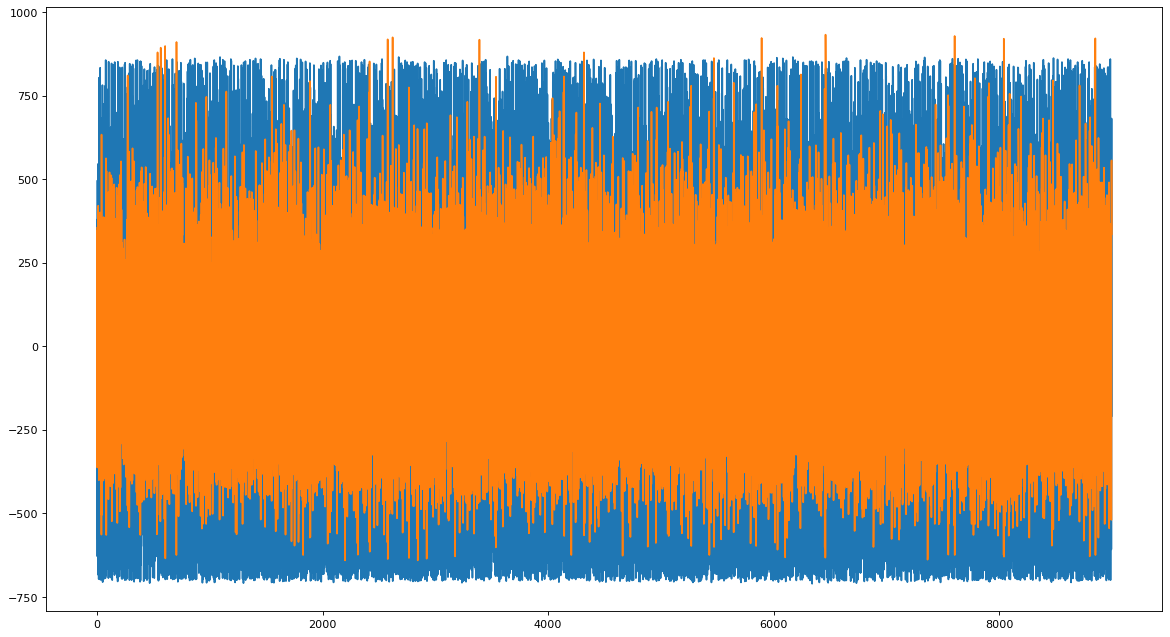

In [11]:
# Analog2_stream and Analog3_stream for plot
Analog2_stream = []
Analog3_stream = []

for i in range(0,2**15): # all_of_the_parameters.sample_size
    channel2 = output_buffer_0[0+i*2]
    channel3 = output_buffer_0[1+i*2]
    
    Analog2_stream.append(channel2)   
    Analog3_stream.append(channel3)

mp.figure(figsize=(18, 10), dpi=80)

mp.plot(Analog2_stream[:9000:]) # Q
mp.plot(Analog3_stream[:9000:]) # I